In [1]:
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


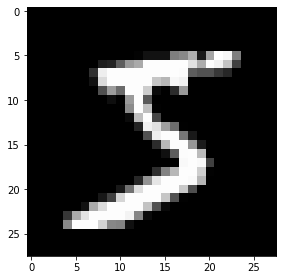

In [3]:
from skimage import io
io.imshow(x_train[0])

In [4]:
print(y_train[0]) 

5


In [5]:
print(x_train.shape) #reshape for CNN
print(x_train[0][0][15])
x_train = x_train.reshape(60000,28,28,1)
print(x_train[0][0][15])

(60000, 28, 28)
0
[0]


In [16]:
from tensorflow.python.keras.utils.np_utils import to_categorical

In [18]:
y_train = to_categorical(y_train, 10)

In [19]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [20]:
y_test = to_categorical(y_test, 10)

In [22]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(40, (4, 4), activation = "relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))


In [23]:
model.add(MaxPooling2D(pool_size=(3, 3)))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 40)        20520     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 40)          0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 1, 40)          0         
Total params: 20,840
Trainable params: 20,840
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.add(Flatten())
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 40)        20520     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 40)          0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 1, 40)          0         
_________________________________________________________________
flatten (Flatten)            (None, 40)                0         
Total params: 20,840
Trainable params: 20,840
Non-trainable params: 0
__________________________________________________

In [26]:
model.add(Dense(128, activation="relu"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 40)        20520     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 40)          0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 1, 40)          0         
_________________________________________________________________
flatten (Flatten)            (None, 40)                0         
_________________________________________________________________
dense (Dense)                (None, 128)              

In [27]:
model.add(Dropout(0.2))

In [28]:
model.add(Dense(64, activation="relu"))
model.summary()
model.add(Dropout(0.3))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 40)        20520     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 40)          0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 1, 40)          0         
_________________________________________________________________
flatten (Flatten)            (None, 40)                0         
_________________________________________________________________
dense (Dense)                (None, 128)              

In [29]:
model.add(Dense(10,activation='softmax'))

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 40)        20520     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 40)          0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 1, 40)          0         
_________________________________________________________________
flatten (Flatten)            (None, 40)                0         
_________________________________________________________________
dense (Dense)                (None, 128)              

In [31]:
model.compile(loss=tensorflow.keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [32]:
model.fit(x_train, y_train, batch_size=100, epochs=2)

Epoch 1/2
600/600 [==============================] - 20s 34ms/step - loss: 1.1211 - accuracy: 0.7246
Epoch 2/2
600/600 [==============================] - 24s 40ms/step - loss: 0.2293 - accuracy: 0.9372


In [34]:
score = model.evaluate(x_train, y_train)

1875/1875 [==============================] - 7s 4ms/step - loss: 0.1307 - accuracy: 0.9615


In [35]:
print(score)

[0.13067466020584106, 0.9614666700363159]
